In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Exploring the data
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
# Missing values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [22]:
df[df.isna().any(axis=1) == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [37]:
# Imputing missing values with median
def impute(df,variable,median):
    df[variable+' median'] = df[variable].fillna(median)

In [33]:
budget_median = df['budget'].median()

In [34]:
impute(df,'budget',budget_median)

In [36]:
runtime_median = df['runtime'].median()

In [38]:
impute(df,'runtime',runtime_median)

In [39]:
gross_median = df['gross'].median()
impute(df,'gross',gross_median)

In [42]:
score_median = df['score'].median()
votes_median = df['votes'].median()
impute(df,'score',score_median)
impute(df,'votes',votes_median)

In [43]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budgetmedian,runtime median,gross median,score median,votes median
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,19000000.0,146.0,46998772.0,8.4,927000.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,4500000.0,104.0,58853106.0,5.8,65000.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,18000000.0,124.0,538375067.0,8.7,1200000.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,3500000.0,88.0,83453539.0,7.7,221000.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,6000000.0,98.0,39846344.0,7.3,108000.0


In [44]:
df.drop(['budget','score','gross','votes','runtime'],axis=1,inplace=True)

In [45]:
df.head()

,name,rating,genre,year,released,director,writer,star,country,company,budgetmedian,runtime median,gross median,score median,votes median
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,19000000.0,146.0,46998772.0,8.4,927000.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,4500000.0,104.0,58853106.0,5.8,65000.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,18000000.0,124.0,538375067.0,8.7,1200000.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,3500000.0,88.0,83453539.0,7.7,221000.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,6000000.0,98.0,39846344.0,7.3,108000.0


In [46]:
df.isna().sum()

name               0
rating            77
genre              0
year               0
released           2
director           0
writer             3
star               1
country            3
company           17
budgetmedian       0
runtime median     0
gross median       0
score median       0
votes median       0
dtype: int64

In [47]:
df.dtypes

name               object
rating             object
genre              object
year                int64
released           object
director           object
writer             object
star               object
country            object
company            object
budgetmedian      float64
runtime median    float64
gross median      float64
score median      float64
votes median      float64
dtype: object

In [48]:
# Changing datatypes
df['budgetmedian'] = df['budgetmedian'].astype('int64')
df['gross median'] = df['gross median'].astype('int64')

In [68]:
# Cleaning the released column
df['released'] = df['released'].str.split('(').str[0]

In [74]:
# Changing datatype of released column
df['released'] = pd.to_datetime(df['released'])

In [79]:
# Creating year column 
df['correct_year'] = df['released'].dt.strftime('%Y')

In [80]:
df.head()

,name,rating,genre,year,released,director,writer,star,country,company,budgetmedian,runtime median,gross median,score median,votes median,correct_year
0,The Shining,R,Drama,1980,1980-06-13,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,19000000,146.0,46998772,8.4,927000.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,4500000,104.0,58853106,5.8,65000.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,18000000,124.0,538375067,8.7,1200000.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,3500000,88.0,83453539,7.7,221000.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,6000000,98.0,39846344,7.3,108000.0,1980


In [81]:
# Finding correlations
# Budget and gross can have a high correlation
# It can also be correlated with Company

<AxesSubplot:xlabel='budgetmedian', ylabel='gross median'>

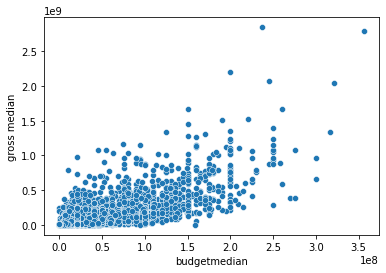

In [87]:
sns.scatterplot(x=df['budgetmedian'],y=df['gross median'])

<AxesSubplot:xlabel='budgetmedian', ylabel='gross median'>

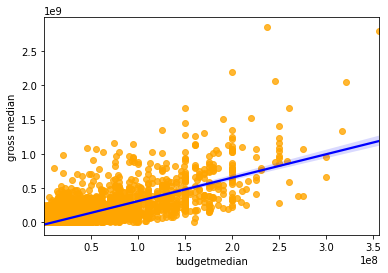

In [92]:
sns.regplot(x=df['budgetmedian'],y=df['gross median'],color='orange',line_kws={'color':'blue'})

In [93]:
df.corr()

,year,budgetmedian,runtime median,gross median,score median,votes median
year,1.000000,0.291690,0.120662,0.259504,0.098013,0.222573
budgetmedian,0.291690,1.000000,0.273371,0.745881,0.061931,0.460968
runtime median,0.120662,0.273371,1.000000,0.244380,0.399407,0.309151
gross median,0.259504,0.745881,0.244380,1.000000,0.185563,0.632120
score median,0.098013,0.061931,0.399407,0.185563,1.000000,0.409157
votes median,0.222573,0.460968,0.309151,0.632120,0.409157,1.000000


<AxesSubplot:>

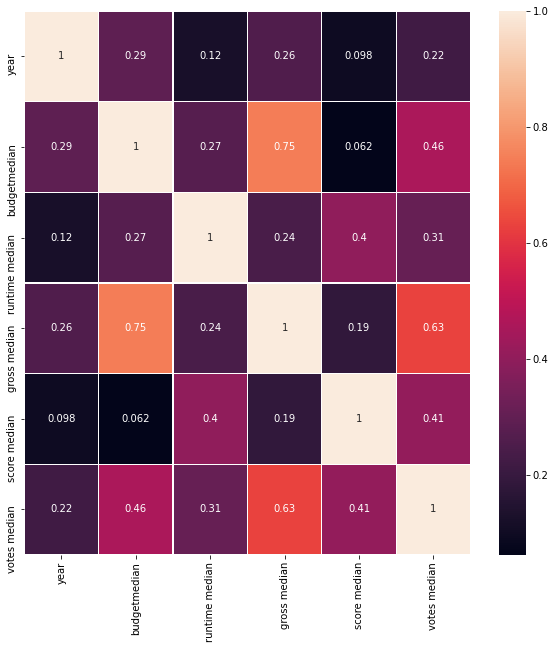

In [101]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax = ax, linewidth=0.3)

In [103]:
df_numerized = df

for col in df_numerized.columns:
    if (df_numerized[col].dtypes == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,released,director,writer,star,country,company,budgetmedian,runtime median,gross median,score median,votes median,correct_year
0,6587,6,6,1980,1980-06-13,2589,4014,1047,54,2319,19000000,146.0,46998772,8.4,927000.0,0
1,5573,6,1,1980,1980-07-02,2269,1632,327,55,731,4500000,104.0,58853106,5.8,65000.0,0
2,5142,4,0,1980,1980-06-20,1111,2567,1745,55,1540,18000000,124.0,538375067,8.7,1200000.0,0
3,286,4,4,1980,1980-07-02,1301,2000,2246,55,1812,3500000,88.0,83453539,7.7,221000.0,0
4,1027,6,4,1980,1980-07-25,1054,521,410,55,1777,6000000,98.0,39846344,7.3,108000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2020-10-23,1500,2289,2421,55,-1,7000,90.0,20205757,3.1,18.0,40
7664,1678,-1,4,2020,2020-02-07,774,2614,1886,55,539,20500000,90.0,20205757,4.7,36.0,40
7665,4717,-1,6,2020,2020-04-27,2061,2683,2040,55,941,58750,104.0,20205757,5.7,29.0,40
7666,2843,-1,6,2020,2020-10-01,1184,1824,450,55,-1,15000,120.0,20205757,6.5,33000.0,40


<AxesSubplot:>

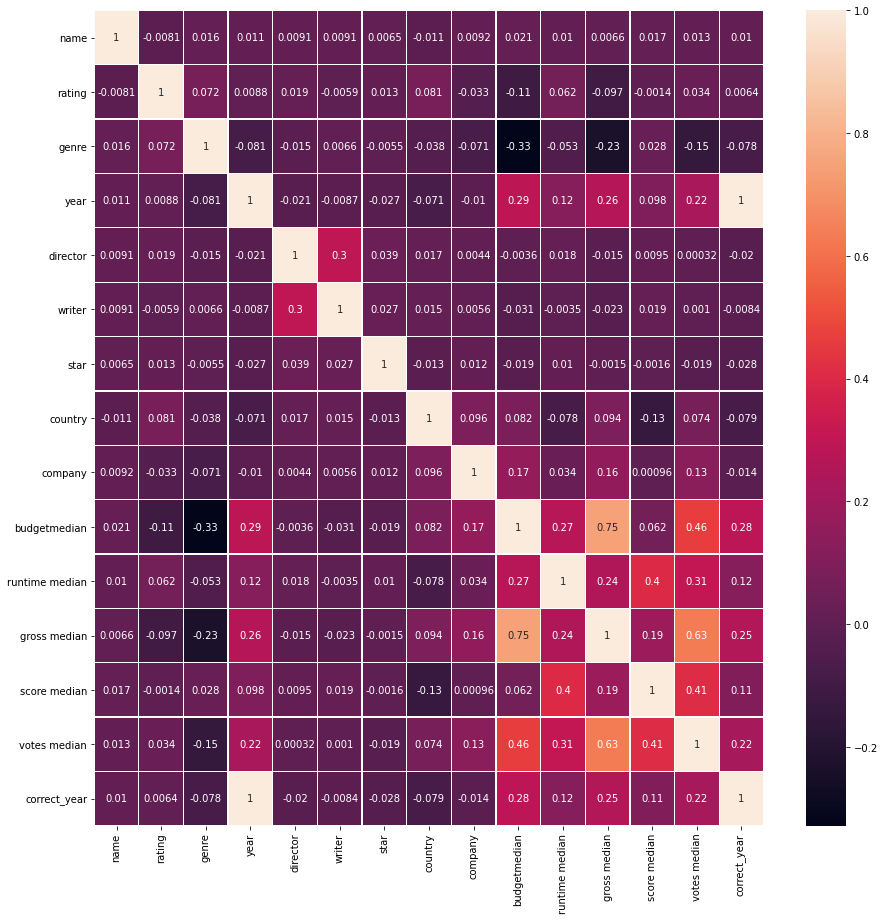

In [105]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_numerized.corr(),annot=True,ax = ax, linewidth=0.3)

In [109]:
# Finding the correlation which has higher value
corr_pairs = df_numerized.corr().unstack()
corr_pairs

name          name              1.000000
              rating           -0.008069
              genre             0.016355
              year              0.011453
              director          0.009079
                                  ...   
correct_year  runtime median    0.120569
              gross median      0.252749
              score median      0.106309
              votes median      0.217927
              correct_year      1.000000
Length: 225, dtype: float64

In [110]:
corr_pairs[corr_pairs.sort_values() > 0.5]

name            name              1.000000
rating          rating            1.000000
genre           genre             1.000000
year            year              1.000000
                correct_year      0.996397
director        director          1.000000
writer          writer            1.000000
star            star              1.000000
country         country           1.000000
company         company           1.000000
budgetmedian    budgetmedian      1.000000
                gross median      0.745881
runtime median  runtime median    1.000000
gross median    budgetmedian      0.745881
                gross median      1.000000
                votes median      0.632120
score median    score median      1.000000
votes median    gross median      0.632120
                votes median      1.000000
correct_year    year              0.996397
                correct_year      1.000000
dtype: float64